# Trabalho 3

------------------------

## Bibliotecas

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## Função para resolver o problema

In [18]:
def resolver_difusao(t_total, n, L, alpha, dt, T_A, q_L, T_inicial):
    
    # 1. Discretização
    dx = L / (n - 1)  # Passo no espaço
    Nt = int(t_total / dt)  # Número de passos no tempo
    
    # 2. Inicialização da Matriz de Coeficientes A
    A = np.zeros((n, n))
    
    # 3. Preenchimento da Matriz A (nós internos)
    for i in range(1, n - 1):
        A[i, i-1] = -alpha / dx**2
        A[i, i]   = 1 / dt + 2 * alpha / dx**2  # Termo "+ k" removido
        A[i, i+1] = -alpha / dx**2

    # 4. Condições de Contorno na Matriz A
    # Em x = 0 (i=0): Dirichlet T(0,t) = T_A
    A[0, 0] = 1.0
    
    # Em x = L (i=n-1): Neumann dT/dx = q_L
    # Aprox. 1ª ordem: (T[n-1] - T[n-2]) / dx = q_L  =>  T[n-1] - T[n-2] = q_L * dx
    A[n-1, n-1] = 1.0
    A[n-1, n-2] = -1.0

    # 5. Condição Inicial
    T = np.full(n, T_inicial)  # Define a temperatura inicial em toda a barra
    
    # 6. Armazenamento dos resultados
    T_historico = [np.copy(T)] # Armazena o estado inicial (t=0)
    tempos = [0.0]
    
    # 7. Loop no Tempo
    for k in range(Nt):
        # Vetor de termos independentes (lado direito)
        b = T / dt  # b = T_k / dt
        
        # Aplicando condições de contorno no vetor b
        b[0] = T_A            # Dirichlet
        b[n-1] = q_L * dx     # Neumann
        
        # Resolvendo o sistema linear A * T_{k+1} = b
        T = np.linalg.solve(A, b)
        
        # Armazenando resultados
        T_historico.append(np.copy(T))
        tempos.append((k + 1) * dt)

    # 8. Cria o vetor de posições x
    x = np.linspace(0, L, n)
    
    return T_historico, tempos, x

## Parâmetros para a solução

In [19]:
L = 1.0          # Comprimento da barra (m) 
alpha = 1.0e-4   # Coef. de difusão térmica (m^2/s) 
n = 51           # Número de nós 
dt = 10.0        # Passo no tempo (s) 
t_total = 500.0  # Tempo total de simulação (s) 
T_inicial = 20.0 # Temperatura inicial (°C) 
T_A = 100.0      # Temp. em x=0 (°C) (Dirichlet) 
q_L = 0.0        # Fluxo em x=L (Neumann - isolado)

## Obtém a solução e o domnínio

In [20]:
T_historico, tempos, x = resolver_difusao(t_total, n, L, alpha, dt, T_A, q_L, T_inicial)

T_historico

[array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
        20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.]),
 array([100.        ,  62.93400335,  43.04160805,  32.36585597,
         26.63644627,  23.56161508,  21.91142992,  21.02581673,
         20.55053024,  20.29545584,  20.15856377,  20.08509722,
         20.04566955,  20.02450971,  20.01315375,  20.00705929,
         20.00378854,  20.00203322,  20.00109118,  20.00058561,
         20.00031428,  20.00016867,  20.00009052,  20.00004858,
         20.00002607,  20.00001399,  20.00000751,  20.00000403,
         20.00000216,  20.00000116,  20.00000062,  20.00000033,
         20.00000018,  20.0000001 ,  20.00000005,  20.00000003,
         20.00000001,  20.00000001,  20.        ,  20.        ,
         20.        ,  20.        ,  20.        ,  20.        ,
       

## Plota o resultado obtido

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_7854/3049135925.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'Evolução da Temperatura na Barra (Método Implícito)\n$\\alpha={alpha}$, $n={n}$, $\Delta t={dt}s$')


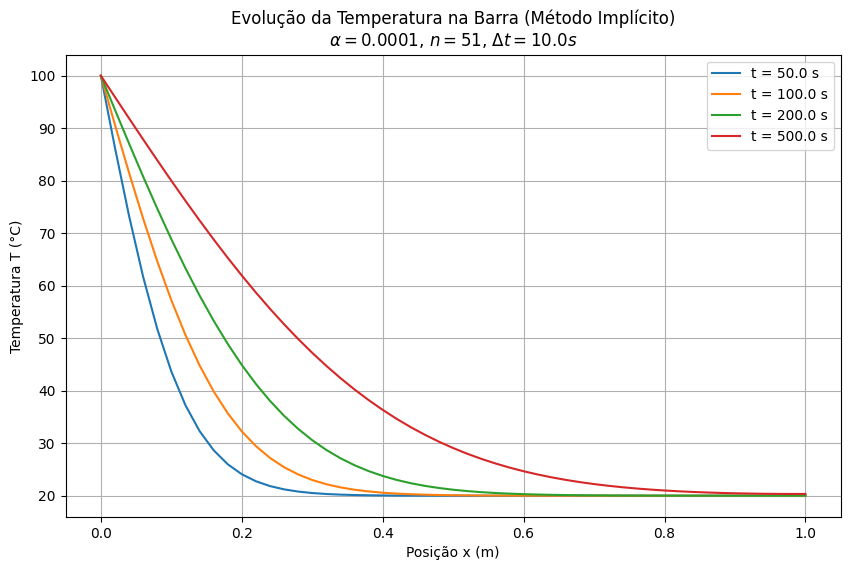

In [21]:
# 3. Plotar os resultados em instantes específicos
plt.figure(figsize=(10, 6))

# Tempos que queremos plotar (em segundos)
tempos_para_plotar = [50, 100, 200, 500]

for t_plot in tempos_para_plotar:
    # Encontra o índice mais próximo no nosso array de 'tempos'
    indice = np.argmin(np.abs(np.array(tempos) - t_plot))
    plt.plot(x, T_historico[indice], label=f't = {tempos[indice]} s')

plt.xlabel('Posição x (m)')
plt.ylabel('Temperatura T (°C)')
plt.title(f'Evolução da Temperatura na Barra (Método Implícito)\n$\\alpha={alpha}$, $n={n}$, $\Delta t={dt}s$')
plt.grid(True)
plt.legend()
plt.show()

---------------------------